## Install Libraries

In [ ]:
pip install sklearn

In [ ]:
pip install pandas


In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Check Out Data 

In [2]:
Ather_Data=pd.read_csv('DIAssignment.csv')

In [3]:
Ather_Data.head()

,Unnamed: 0,bike_id,age_scaled,model_type,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc
0,0,bike_21062,0.261905,Model_4,305,59,Decent,0.976820
1,1,bike_11582,0.261905,Model_4,136,11,Decent,0.687972
2,2,bike_19932,0.261905,Model_4,209,90,Bad,0.475168
3,3,bike_21418,0.261905,Model_4,221,17,Good,0.756067
4,4,bike_6349,0.261905,Model_4,1778,91,Good,0.986102


Here we observe the sample data of the dataset.

In [4]:
Ather_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2848 non-null   int64  
 1   bike_id                  2848 non-null   object 
 2   age_scaled               2848 non-null   float64
 3   model_type               2848 non-null   object 
 4   no_of_riding_sessions    2848 non-null   int64  
 5   no_of_charging_sessions  2848 non-null   int64  
 6   charging_behavior        2848 non-null   object 
 7   mileage_km_per_soc       2848 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 178.1+ KB


In [5]:
Ather_Data.columns

Index(['Unnamed: 0', 'bike_id', 'age_scaled', 'model_type',
       'no_of_riding_sessions', 'no_of_charging_sessions', 'charging_behavior',
       'mileage_km_per_soc'],
      dtype='object')

Since we do not need 'Unnamed: 0' and 'bike_id', will remove it from the data. Also removing the model type as it is a category.

In [6]:
Ather_Data=Ather_Data.drop(['Unnamed: 0','bike_id','model_type'],axis=1)

Let us scale out the age_scaled and mileage_km_per_soc.

Scaling Factor for age_scaled = 5
Scaling Factor for mileage_km_per_soc = 100

In [7]:
Ather_Data.mileage_km_per_soc=Ather_Data.mileage_km_per_soc*100
Ather_Data.age_scaled=Ather_Data.age_scaled*5

After scaling out the columns, let us rename them for understanding.

In [8]:
Ather_Data.rename(columns={'age_scaled':'age_scaled_out','mileage_km_per_soc':'mileage_km_per_soc_scaled_out'},inplace=True)

To verify the changes let us relook into the sample of dataframe again.

In [10]:
Ather_Data.head()

,age_scaled_out,no_of_riding_sessions,no_of_charging_sessions,charging_behavior,mileage_km_per_soc_scaled_out
0,1.309524,305,59,Decent,97.682018
1,1.309524,136,11,Decent,68.797207
2,1.309524,209,90,Bad,47.516750
3,1.309524,221,17,Good,75.606701
4,1.309524,1778,91,Good,98.610210


## Exploratory Data Analysis

To Begin with let us use pairplot from seaborn library to understand if there is any pattern between the attributes.

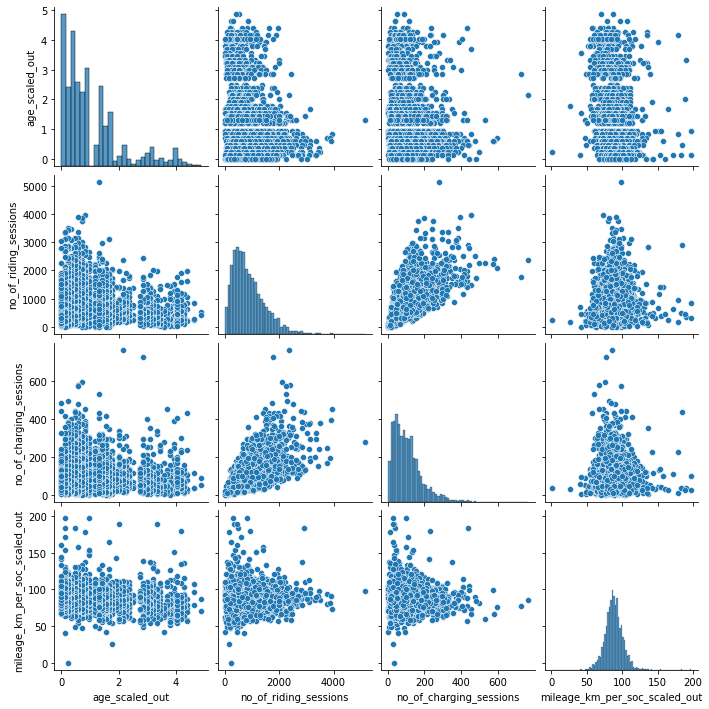

In [11]:
sns.pairplot(Ather_Data)

Since there are many independant variables, let us compare it with the target variable i.e mileage_km_per_soc.

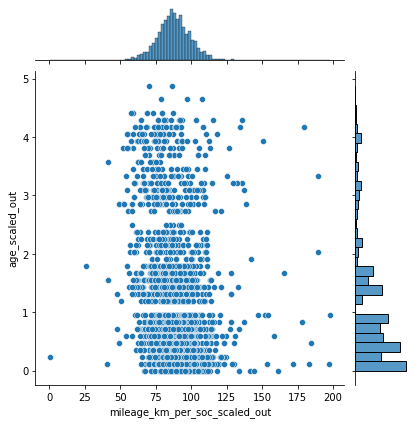

In [13]:
sns.jointplot(x='mileage_km_per_soc_scaled_out',y='age_scaled_out',data=Ather_Data,kind='scatter')

From the above plot we observe that irrespective of the age of the vehicle the mileage range is between 60 to 120 approximately along with some outliers.

Let us further understand the correlation between the independant variables with the target variable by creating a heatmap.

<AxesSubplot:>

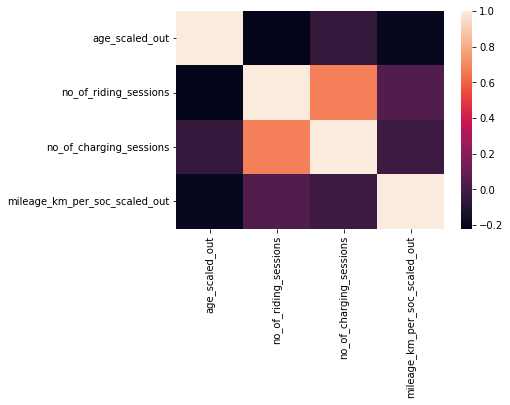

In [14]:
sns.heatmap(Ather_Data.corr())

It can be observed from the above heatmap that 'no_of_riding_sessions' and 'no_of_charging_sessions' somewhat correlates with the mileage than 'age_scaled_out'.

In [15]:
Ather_Data.columns

Index(['age_scaled_out', 'no_of_riding_sessions', 'no_of_charging_sessions',
       'charging_behavior', 'mileage_km_per_soc_scaled_out'],
      dtype='object')

Since we also have the 'charging_behavior' column, which is a categorical type, let us split it into different columns based on its category by creating dummies.

In [16]:
Charge_Behavior=pd.get_dummies(Ather_Data['charging_behavior'],drop_first=True)

Let us drop the original column and concat the dummies to the original dataframe.

In [17]:
Ather_Data.drop(['charging_behavior'],axis=1,inplace=True)

In [18]:
Ather_Data=pd.concat([Ather_Data,Charge_Behavior],axis=1)

Let us review the sample of dataframe once again to check the changes.

In [20]:
Ather_Data.head()

,age_scaled_out,no_of_riding_sessions,no_of_charging_sessions,mileage_km_per_soc_scaled_out,Decent,Good
0,1.309524,305,59,97.682018,1,0
1,1.309524,136,11,68.797207,1,0
2,1.309524,209,90,47.516750,0,0
3,1.309524,221,17,75.606701,0,1
4,1.309524,1778,91,98.610210,0,1


Now let us create the heatmap again to see if the new columns added impact the correlation with the target variable.

<AxesSubplot:>

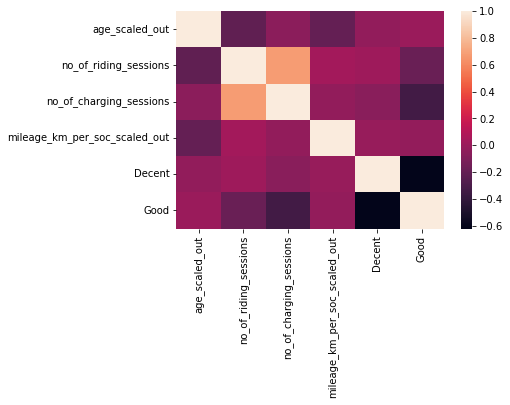

In [21]:
sns.heatmap(Ather_Data.corr())

It can be observed the charging behaviour as well slightly correlates with the mileage of the vehicle.

Hence given the data here, we observe that except age_scaled_out, all the columns are impacting the mileage of the vehicle on their respective correlation, which are neither high nor too low.

Let us take our analysis further on training a model to predict the mileage based on the independant variables.

In [22]:
Ather_Data.columns

Index(['age_scaled_out', 'no_of_riding_sessions', 'no_of_charging_sessions',
       'mileage_km_per_soc_scaled_out', 'Decent', 'Good'],
      dtype='object')

## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Mileage per soc column.

### X and y arrays

In [47]:
X=Ather_Data[['age_scaled_out','no_of_riding_sessions',
       'no_of_charging_sessions', 'Decent', 'Good']] #Excluding the age_scaled_out as it does not correlate with the target variable
y=Ather_Data['mileage_km_per_soc_scaled_out']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

## Creating and Training the model 

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()

In [52]:
lm.fit(X_train,y_train)

LinearRegression()

## Model Evaluation 

In [53]:
print(lm.intercept_)


95.26402114875849


In [55]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age_scaled_out,-2.915152
no_of_riding_sessions,0.001414
no_of_charging_sessions,-0.022389
Decent,-2.396134
Good,-4.094617


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **age_scaled_out** is associated with an **decrease of \-2.915152 in mileage**.
- Holding all other features fixed, a 1 unit increase in **no_of_riding_sessions** is associated with an **increase of \0.001414 in mileage**.
- Holding all other features fixed, a 1 unit increase in **no_of_charging_sessions** is associated with an **decrease of \-0.022389 in mileage**.
- Holding all other features fixed, a 1 unit increase in **Decent** is associated with an **decrease of \-2.396134 in mileage**.
- Holding all other features fixed, a 1 unit increase in **Good** is associated with an **decrease of \-4.094617 in mileage**.

## Predictions from our Model 

In [56]:
predictions=lm.predict(X_test)

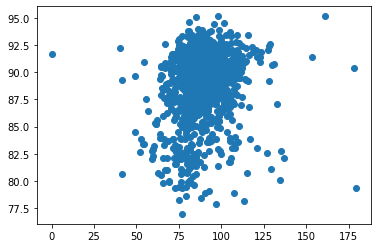

In [57]:
plt.scatter(y_test,predictions)

### Residual Histogram

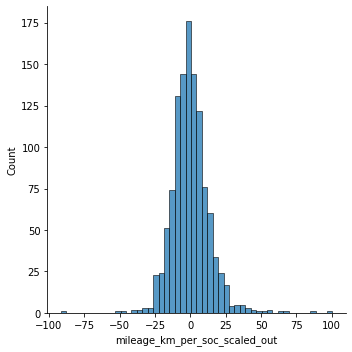

In [58]:
sns.displot((y_test-predictions),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [59]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2- SCORE:', metrics.r2_score(y_test,predictions))

MAE: 9.55304351844796
MSE: 180.81813414073014
RMSE: 13.44686335695913
R2- SCORE: 0.033380839509697724


From the R2 Score we understand the the model has turned out to be very poor, as the independant variables were not highly or moderately correlated with the target variable. The ideal R2 score should be over 0.8 inorder to affirm that the model is performing good. However we could have improved the model to predict the mileage better if we had the below data :

1. Unscaled data or Raw data of Age scaled and Mileage
2. Riders terrain category.
3. If rider had pillion or luggage.
4. Rider's path Traffic or Highway.

